# Simple physics related to ACA high background events

In particular, thinking about the behavior of a small piece of MLI which becomes
detached from the spacecraft.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import astropy.units as u
import numpy as np
from astropy.constants import G, M_earth
import matplotlib.pyplot as plt
%matplotlib inline

### Gravity gradient

In [2]:
r = 5000 * 1000 * u.m
dr = 5 * u.m

In [3]:
acc_grav_grad = G * M_earth * dr / r**3

In [4]:
acc_grav_grad

<Quantity 1.5944016e-05 m / s2>

In [5]:
0.5 * acc_grav_grad * (10000 * u.s)**2

<Quantity 797.2008 m>

### Solar pressure

In [6]:
# https://en.wikipedia.org/wiki/Radiation_pressure for a perfectly absorbing material
# Use 9.0 for a perfectly reflecting material
p_solar = 4.5 * u.uPa

In [7]:
# SANITY CHECK
# Compare to Wiki article "Total force on a 800m x 800m sail is about 5 Newtons"
# https://en.wikipedia.org/wiki/Solar_sail
# This gives about 2.9 N for perfectly absorbing, would be 5.8 N for perfectly reflecting.
(p_solar * (800 * u.m)**2).decompose()

<Quantity 2.88 kg m / s2>

In [8]:
rho = 1.38 * u.g / u.cm**3  # Google

In [9]:
n_layer = 2  # ?? Maybe many layers flake at once?
thickness = n_layer * 6 * u.um # https://en.wikipedia.org/wiki/Multi-layer_insulation

In [10]:
area = 25 * u.cm**2

In [11]:
mass = area * thickness * rho

In [12]:
eff_area = area * 2 / np.pi  # 2/pi is mean of abs(cos(theta))

In [13]:
acc_solar = (p_solar * eff_area / mass).decompose()

In [14]:
acc_solar

<Quantity 0.00017299 m / s2>

In [15]:
0.5 * acc_solar * (10000 * u.s)**2

<Quantity 8649.72516804 m>

### Super-simple orbit integrator for playing

In [16]:
n_out = int(1e5)
a_semi = 1
ecc = 0.3

In [17]:
per = 2 * np.pi * a_semi**(3/2)
num_per = 10
dt = per * num_per / n_out

In [18]:
pos = np.zeros((n_out + 1, 2))
vel = np.zeros((n_out + 1, 2))

In [19]:
x0 = a_semi * (1 + ecc)
y0 = 0.0
vx0 = 0
vy0 = np.sqrt((1 - ecc) / np.linalg.norm([x0, y0]))

In [20]:
vy0

0.7337993857053428

In [21]:
pos[0] = [x0, y0]
vel[0] = [vx0, vy0]

In [22]:
for i in range(n_out):
    pos[i+1] = pos[i] + dt * vel[i]
    force = -pos[i+1] / np.linalg.norm(pos[i+1])**3
    vel[i+1] = vel[i] + dt * force

In [23]:
time = np.linspace(0, num_per * per, n_out + 1)

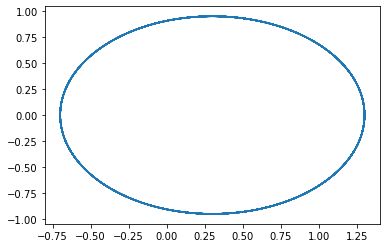

In [24]:
plt.plot(pos[:, 0], pos[:, 1])

In [25]:
%astro
from astropy.constants import G, M_earth

astropy=4.2
